# Clean And Analyze Employee Exit Surveys

The aim of this proyect is a study of employee exit surveys from the Department of Education, Training and Employment (DETE) and the Queensland Institute of Technical and Further Education (TAFE) in Queensland, Australia.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey =  pd.read_csv('dete_survey.csv')
tafe_survey =  pd.read_csv("tafe_survey.csv")

In [3]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

We are going to work with two data sets, one called `dete_survey.csv` and the other `tafe_survey.csv`.

En el ejercicio se me invita a utilizar otros metodos de data exploration como las `Series.value_counts` y el metodo `DataFrame.isnull()` para explorar los datos y y averiguar los próximos pasos!

por lo tanto segun lo que he ido haciendo hasta ahora y mis apuntes lo primero que haría sería:

1 - ¿Qué necesitamos saber?

    ¿Los empleados que llevan poco tiempo trabajando para los institutos renuncian por algún tipo de insatisfacción? 
    ¿Y los empleados que llevan más tiempo?
    ¿Los empleados más jóvenes dimiten por algún tipo de insatisfacción? 
    ¿Y los empleados de más edad?

2 - ¿Tenemos un diccionario de datos?

We do not have a data dictionary but we do know which columns we are going to work with from each of the sets.

#### - Columns from the dete_survey.csv:

- `ID`: An id used to identify the participant of the survey.

- `SeparationType`: The reason why the person's employment ended.

- `Cease Date`: The year or month the person's employment ended.

- `DETE Start Date`: The year the person began employment with the DETE.

#### - Columns from the tafe_survey.csv:

- `Record ID`: An id used to identify the participant of the survey.

- `Reason for ceasing employment`: The reason why the person's employment ended.

- `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years).

3 - Comprobar el tipo de codificación con la que estamos trabajando en nuestros .csv (file en Linux) y cargarla de manera oportuna indicando de que se trata.

4 - Importar las librerias pertinentes y en caso de necesitar graficar algo en jupyter cargar %matplotlib inline

5 - Se hace una primera visualización de los DataFrame con df.info() y df.head() 

### Data exploration method 
- dete_survey.csv
- tafe_survey.csv

## Dataframe `dete_survey`

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey['Cease Date'].unique() # para ver el caso de 'Not Stated', o te metes en las series o no lo ves! 

array(['08/2012', '05/2012', '07/2012', '2012', '2013', '2014', '2010',
       '09/2013', '07/2013', '08/2013', '06/2013', '04/2013', '05/2013',
       '09/2010', '01/2014', '11/2012', '04/2014', '12/2013', '07/2014',
       '10/2013', '11/2013', 'Not Stated', '09/2014', '07/2006',
       '02/2014'], dtype=object)

In [6]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


### Apunte

Se me ocurrio que podia hacer una busqueda de los valores nulos, pero lo haria combinandolo con otros metodos y fué apareciendo esto que me parece interesante.

In [7]:
dete_survey.isnull() # esto me muestra el df, de poco me sirve tal y como está

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [8]:
dete_survey.isnull().sum().sort_values(ascending = False ) # esto me dice los nulos en cada columna!

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Initiative                               9
Performance

In [9]:
dete_survey.isnull().describe() # el valor está en que te dice si el valor es unico o no.

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822
unique,1,1,1,1,1,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
freq,822,822,822,822,822,817,455,822,696,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,806,819,815,799,790


In [10]:
null_dete_survey = dete_survey.isnull().sum().unique().sum() # number of NaN's on dete_survey.csv
null_dete_survey # esto es el total de nulos en el df

5619

In [11]:
notnull_dete_survey = dete_survey.notnull().sum().unique().sum()
notnull_dete_survey # esto es el total de notnulls en el df , de cara a hacer porcentages...

15753

## tafe_survey

In [12]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [13]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [14]:
tafe_survey.isnull().sum().sort_values(ascending = False )

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Travel                                                                                                                                     265
Contributing Factors. Other                                                                                                                                      265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. Career Move - Private Sector                                                                                                               265
Contributi

In [15]:
tafe_survey.isnull().describe() # esta combinacion de isnull no es muy util a simple vista

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [16]:
null_tafe_survey = tafe_survey.isnull().sum().unique().sum() # number of nulls's on dete_survey.csv
null_dete_survey

5619

In [17]:
notnull_tafe_survey = tafe_survey.notnull().sum().unique().sum() # number of Notnulls's on dete_survey.csv
notnull_dete_survey

15753

In [18]:
dete_survey['Cease Date'].value_counts() # Aqui vuelve a salir 'Not stated', no es NaN, hay que tratarlo.

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: Cease Date, dtype: int64

## 2. Identify Missing Values and Drop Unnecessary Columns

In [19]:
# Not Stated' indica que faltan valores, pero no se representan como NaN !
dete_survey =  pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [20]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [21]:
#dete_survey_updated.info()

In [22]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis = 1 )

In [23]:
#tafe_survey_updated.info()

In [24]:
%%html
<style>
table {float:left}
</style>

### Observation:

A no ser que sea muy relevante, el explicar los porcentages de los datos solo me importa a mi por tanto el indicarlo como lo he hecho a continuacion no le serviría de nada al cliente.

| DataFrame     | rows   | columns | NaN  | Not NaN | Percentage of NaN values |
| :---          | :---   | :---    | :--- |:---     | :---                     |
| `dete_survey` | 821    | 56      | 5895 | 17943   | 32,85%                   |
| `tafe_survey` | 702    | 72      | 5895 | 17943   | 32,85%                   |



## 3. Clean Column Names

Se hace el renombrado para `dete_survey` utilizando metodos vectoriales y para `tafe_survey` la sustitución de un nombre por otro gracias a df.rename.  

In [25]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [26]:
#dete_survey_updated.columns # se comprueba que cease_date sea cease_date.

In [27]:
tafe_survey.rename({'Record ID': 'id',
                    'CESSATION YEAR': 'cease_date',
                    'Reason for ceasing employment': 'separationtype',
                    'Gender. What is your Gender?': 'gender',
                    'CurrentAge. Current Age': 'age',
                    'Employment Type. Employment Type': 'employment_status',
                    'Classification. Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                   axis = 1, inplace = True)

tafe_survey_updated = tafe_survey #.copy()


In [28]:
#dete_survey_updated.head(1)

In [29]:
#tafe_survey_updated.head(1)

### Aqui deberia de haber un markdown de momento se queda asi.

'''
explicando que es lo que he hecho y porque

en primer lugar utilizando metodos vectoriales (str) he formateado el nombre de las columnas
en el dataframe dete_survey y despues de haberlo hecho mediante un metodo llamado set_axis que 
unicamente necesita una lista con el numero exacto de nombres que quiero modificar de las
columnas y

mediante el metodo df.rename he actualizado los nombres de las columnas mediante un diccionario



'''

## 4. Filter the Data


Vamos a eliminar mas datos y nos recuerda cual es la pregunta que inicialmente nos propusimos responder:

***¿Los empleados que llevan poco tiempo trabajando en los institutos renuncian por algún tipo de insatisfacción? 
¿Qué ocurre con los empleados que llevan más tiempo en el trabajo?***

Nos dice que si echamos un vistazo a los valores unicos que hay en la columna `separationtype` de ambos dataframes y nos avisa de que veremos que cada uno de los dataframes contiene un par de tipos de separación diferentes. 

In [30]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [31]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Para este proyecto, sólo analizaremos a los encuestados que **renunciaron**, por lo que su tipo de separación contiene la cadena **'Resignation'**

Tambien me invitan a que si quiero completar el proyecto utilizando todos motivos por los cuales la gente dejo el trabajo, encontraré más problemas para trabajar en el proceso de limpieza de datos.

In [32]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [33]:
tafe_survey_updated['separationtype'].unique()   #  nan !!!

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [34]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                        (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                        (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

In [35]:
#dete_resignations

In [36]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [37]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Write a markdown paragraph explaining the changes you made and why.

## 5. Verify the Data

Antes de empezar a limpiar hay que verificar que los datos no tienen incoherencias.

Dado que la fecha de cese es el último año de empleo de la persona y la fecha de inicio es el primer año de empleo de la persona, no tendría sentido tener años posteriores a la fecha actual.

Dado que la mayoría de la gente en este campo empieza a trabajar a los 20 años, también es poco probable que la fecha dete_start_date fuera anterior al año 1940. (fecha actual - 20 != 1940)

Si tenemos muchos años superiores a la fecha actual o inferiores a 1940, no querríamos continuar con nuestro análisis, porque podría significar que hay algo muy malo en los datos. Si hay una pequeña cantidad de valores que son irrealmente altos o bajos, podemos eliminarlos.

In [38]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [39]:
pattern = r"([0-9]{4})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand=False).astype(float) # expand True df False Series

Utilice el método `Series.value_counts()` para comprobar los valores de las columnas:

- `cease_date` y `dete_start_date` en df `dete_resignations` 

- y la columna `cease_date` en df `tafe_resignations`.

In [40]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [41]:
dete_resignations['dete_start_date'].unique()

array([2005., 1994., 2009., 1997., 1998., 2007.,   nan, 1982., 1980.,
       1973., 1995., 2003., 2006., 2011., 1977., 1974., 1976., 1993.,
       2008., 1986., 2002., 2004., 2010., 2012., 1989., 1999., 1996.,
       2000., 1991., 1992., 2001., 1988., 1990., 1985., 1963., 2013.,
       1972., 1983., 1971., 1984., 1975., 1987.])

In [42]:
tafe_resignations['cease_date'].value_counts(ascending = False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [43]:
%matplotlib inline 
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8)) 
fig.add_subplot(1,1,1) 

dete_resignations.boxplot(column=['dete_start_date','cease_date'])#.set_ylim(2011, 2015) 
#tafe_resignations.boxplot(column=['cease_date'])#.set_ylim(2011, 2015) 
plt.ticklabel_format(useOffset=False, axis='y') 
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nfig = plt.figure(figsize=(8,8)) \nfig.add_subplot(1,1,1) \n\ndete_resignations.boxplot(column=['dete_start_date','cease_date'])#.set_ylim(2011, 2015) \n#tafe_resignations.boxplot(column=['cease_date'])#.set_ylim(2011, 2015) \nplt.ticklabel_format(useOffset=False, axis='y') \nplt.show()\n"

# escribe un markdown explicando lo que has encontrado.

## 6. Create a New Column

No hay ningún problema importante con los años porque todas las fechas tienen el mismo tipo de dato.

Los años en cada DataFrame no abarcan el mismo número de años. Dejaremos a su discreción la eliminación de los años que no considere necesarios para el análisis.

Ahora creamos una nueva columna llamada `institute_service` en el df `dete_resignations` 
En esa columna asignaremos el resultado de la diferencia entre la fecha de dimision y la fecha de cuando empezó en dete. 

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'] 

### escribe un markdown explicando lo que has hecho.

## 7. Identify Dissatisfied Employees

La columna que hemos creado en dete_resignations['institute_service'] la utilizaremos para analizar a los encuestados en función de su antiguedad en el empleo.


Estas son las columnas que utilizaremos para clasificar a los empleados como insatisfechos de cada df, si no estoy de acuerdo las puede modificar pero deberia de decir el porque.

- tafe_survey_updated:
  -    `Contributing Factors. Dissatisfaction`
  -    `Contributing Factors. Job Dissatisfaction`
- dete_survey_updated:
  -    `job_dissatisfaction`
  -    `dissatisfaction_with_the_department`
  -    `physical_work_environment`
  -    `lack_of_recognition`
  -    `lack_of_job_security`
  -    `work_location`
  -    `employment_conditions`
  -    `work_life_balance`
  -    `workload`
  
Importante:

Si el empleado indicó alguno de los factores que se dan en estas columnas entonces crearemos una nueva columna llamada `Dissatisfaction` donde lo marcaremos como `dissatisfied` (insatisfecho)

Para que podamos crear esa nueva columna, necesitamos hacer lo siguiente:

- Convertir los valores de `tafe_resignations['Contributing Factors. Dissatisfaction']` y `tafe_resignations['Contributing Factors. Job Dissatisfaction']` en booleano.

- Si alguna de las columnas mencionadas en el parrafo anterior contienen un valor True, eso nos permitirá introducir un True en nuestra nueva columna llamada `Dissatisfaction` 

Para eso utilizaremos el metodo `DataFrame.any()` de manera que:

- devuelva un True si cualquier elemento en la columna seleccionada es True
- devuelva un False si ninguno de los elementos en las columnas seleccionas es True
- devuelva un NaN si el valor es NaN

In [45]:
tafe_survey_updated['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [46]:
tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [47]:
def update_vals(val):
    if ((val == 'NaN') | (val == 'nan')):
        return np.nan
    elif (val == '-'):
        return False
    else:
        return True

Utilice el método **DataFrame.applymap()** para aplicar la función a la columna `'Contributing Factors. Dissatisfaction'` y `'Contributing Factors. Job Dissatisfaction'` en el dataframe `tafe_resignations`.

Recuerda que la función `update_vals` va dentro del metodo df.applymap() sin parentesis.

### Importante:

 a continuanción uso applymap en un dataframe (no puede funcionar de otra manera) pero mediante el uso de una lista que corresponde a los nombres de las columnas sobre las que quiero actuar, puedo modificar esas columas.
 
Es importante porque es la unica manera de poder hacerlo.

In [48]:
factors = ['Contributing Factors. Dissatisfaction',
          'Contributing Factors. Job Dissatisfaction']
                                                       
tafe_resignations[factors] = tafe_resignations[factors].applymap(update_vals)

In [49]:
listado = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
           'lack_of_recognition','lack_of_job_security','work_location','employment_conditions',
           'work_life_balance','workload']

dete_resignations[listado] = dete_resignations[listado].applymap(update_vals)

In [50]:
tafe_resignations[factors].value_counts()

Contributing Factors. Dissatisfaction  Contributing Factors. Job Dissatisfaction
False                                  False                                        241
                                       True                                          36
True                                   True                                          34
                                       False                                         29
dtype: int64

In [51]:
dete_resignations[listado]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True,True,True
12,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True
16,True,True,True,True,True,True,True,True,True
20,True,True,True,True,True,True,True,True,True
21,True,True,True,True,True,True,True,True,True


In [52]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,True,True,True,True,True,True,True,False,False,False,False,False,True,True,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0


In [53]:
tafe_resignations['dissatisfied'] = tafe_resignations[factors].any(axis = 1, skipna = False).copy()
dete_resignations['dissatisfied'] = dete_resignations[listado].any(axis = 1, skipna = False).copy()

In [54]:
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [55]:
dete_resignations['dissatisfied'].value_counts()

True    311
Name: dissatisfied, dtype: int64

In [56]:
dete_resignations_up = dete_resignations
tafe_resignations_up = tafe_resignations

Write a markdown paragraph explaining the changes you made and why.


## 8. Combine the Data

In [57]:
dete_resignations_up['institute'] = 'DETE'

In [58]:
tafe_resignations_up['institute'] = 'TAFE'

In [59]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0)

In [60]:
#combined.describe()

In [61]:
combined_updated = combined.dropna(axis = 1, thresh = 500)

In [62]:
combined_updated['dissatisfied'].value_counts()

True     410
False    241
Name: dissatisfied, dtype: int64

Write a markdown paragraph explaining the changes you made and why.


### 9. Clean the Service Column

In [63]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 51.5+ KB


In [64]:
#pattern = r"([0-9]{2})"
#combined_updated['institute_service'].astype(str).str.extract(pattern)

Double check that you didn't miss extracting any digits.


In [65]:
import re

In [66]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [67]:
combined_updated['institute_service'].dtype

dtype('O')

In [68]:
pat = r"(?P<punto0>[.][0])|(?P<uno_a_dos>[1][-][2])|(?P<tres_a_cuatro>[3][-][4])|(?P<siete_diez>[7][-][1][0])|(?P<once_veinte>[1]{2}-[2][0])|(?P<cinco_seis>[5][-][6])|(?P<Less>Less than 1 year)|(?P<More>More than 20 years)"

def repl(m):
    if m.group("punto0"):
        return m.group("punto0").replace(".0","")
    elif m.group("uno_a_dos"):
        return m.group("uno_a_dos").replace("1-2","1.5")
    elif m.group("tres_a_cuatro"):
        return m.group("tres_a_cuatro").replace("3-4","3.5")
    elif m.group("siete_diez"):
        return m.group("siete_diez").replace("7-10","8.5")
    elif m.group("siete_diez"):
        return m.group("siete_diez").replace("7-10","8.5")
    elif m.group("once_veinte"):
        return m.group("once_veinte").replace("11-20","15.5")
    elif m.group("cinco_seis"):
        return m.group("cinco_seis").replace("5-6","5.5")
    elif m.group("Less"):
        return m.group("Less").replace("Less than 1 year","0.5")
    elif m.group("More"):
        return m.group("More").replace("More than 20 years","20.5")

In [69]:
combined_updated = combined_updated.copy()

In [70]:
combined_updated.loc[:,'institute_service'] = combined_updated['institute_service'].astype(str)

In [71]:
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace((pat), repl).astype(float)

/tmp/ipykernel_46130/4225422118.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_updated['institute_service'] = combined_updated['institute_service'].str.replace((pat), repl).astype(float)


In [72]:
combined_updated['institute_service'].value_counts()

0.5     73
1.5     64
3.5     63
5.5     33
15.5    26
5.0     23
1.0     22
8.5     21
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
20.5    10
13.0     8
8.0      8
15.0     7
20.0     7
10.0     6
14.0     6
12.0     6
17.0     6
22.0     6
18.0     5
16.0     5
11.0     4
23.0     4
24.0     4
32.0     3
39.0     3
19.0     3
21.0     3
36.0     2
25.0     2
30.0     2
26.0     2
28.0     2
49.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
33.0     1
35.0     1
38.0     1
Name: institute_service, dtype: int64

In [73]:
def career_stage(val):
    
    if ((pd.isnull(val) == 'NaN') | (pd.isnull(val) == 'nan')):
        return np.nan
    
    elif (val < 3): # Less than 3 years at a company
        return 'New'
    
    elif ((val >= 3) & (val <= 6.0)): # 3-6 years at a company
        return 'Experienced'
    
    elif ((val >= 7.0) & (val <= 10.0)): # 7-10 years at a company
        return 'Established'
    
    elif (val >= 11.0): #  11 or more years at a company
        return 'Veteran'

In [74]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

In [75]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [76]:
combined_updated['dissatisfied'].value_counts(dropna = False)

True     410
False    241
Name: dissatisfied, dtype: int64

In [77]:
combined_updated.shape

(651, 11)

In [78]:
combined_updated['dissatisfied'].fillna(method = 'ffill', inplace = True) 

In [79]:
combined_updated.pivot_table(values='dissatisfied', index = 'service_cat', aggfunc = np.mean)

,dissatisfied
service_cat,
Established,0.774194
Experienced,0.581395
New,0.476684
Veteran,0.808824


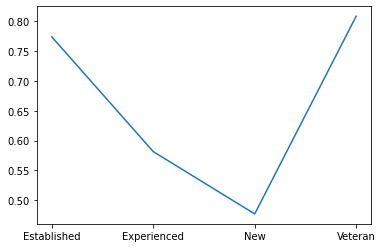

In [80]:
import matplotlib.pyplot as plt

plt.plot(combined_updated.pivot_table(values='dissatisfied', index = 'service_cat', aggfunc = np.mean))
plt.show()

<Figure size 576x288 with 0 Axes>

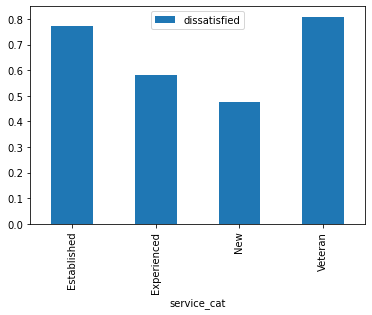

In [81]:
temp1 = combined_updated['service_cat'].value_counts(ascending=True).sort_index()

temp2 = combined_updated.pivot_table(values='dissatisfied', 
                                     index = 'service_cat', aggfunc = np.mean)

fig = plt.figure(figsize=(8,4))
temp2.plot(kind = 'bar')


plt.show()